In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install beautifulsoup4


In [1]:
from bs4 import BeautifulSoup
print("BeautifulSoup is working!")


BeautifulSoup is working!


In [2]:
!pip install beautifulsoup4



In [3]:
pip install requests

In [4]:
from bs4 import BeautifulSoup
import requests
r=requests.get("https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet")
r

<Response [200]>

In [5]:
soup = BeautifulSoup(r.text,"html.parser")

In [6]:
Name =[]
Info = []
Rating = []
Review =[]

In [7]:
demo = """https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page="""
for i in range(1,11):
    url = (demo + str(i)) 
    r=requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    main = soup.find("div", {"class":"review-left-container"})
    sub = main.find_all("div", {"class":"new-review-card-container"})
    for i in sub:
        review = i.find_all("div")
        Review.append(review [-1].text)
        name = i.find("span",{"class":"review-author-name"})
        Name.append(name.text.title())
        details = i.find("div", {"class":"review-meta-data"})
        Info.append(details.text)
        rating = i.find("span", {"class":"star-count-container"})
        Rating.append(rating.text)
    
    print(url)

https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=1
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=2
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=3
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=4
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=5
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=6
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=7
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=8
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=9
https://www.floweraura.com/reviews/p/6617/10-red-roses-bouquet?page=10


In [8]:
import pandas as pd
df = pd.DataFrame({"Name":Name, "Details": Info,"Ratings":Rating, "Reviews":Review})
df

,Name,Details,Ratings,Reviews
0,Anki M,Posted On : 21st Oct 2025Shillong,5,Fresh flowers...liked it.
1,Suraj Chaunal,Posted On : 23rd Sep 2025NoidaOccassion : Birt...,5,the flowers were fresh and colorful. TBH they ...
2,Bakiyalakshmi,Posted On : 22nd Sep 2025BangaloreOccassion : ...,5,"Very fresh flowers, delivered on time with bea..."
3,Pulak.Pal77,Posted On : 19th Sep 2025KolkataOccassion : Bi...,5,Roses quality is very nice.
4,Inaya,Posted On : 31st Aug 2025Udaipur,5,Very beautifull on tome delivered.
...,...,...,...,...
95,Harshal,Posted On : 27th Aug 2024MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...
96,Vicky,Posted On : 26th Aug 2024JAIPUROccassion : Bir...,5,Superb
97,Silvi Jaganath,Posted On : 25th Aug 2024CHENNAIOccassion : Bi...,5,Good
98,Gauri,Posted On : 25th Aug 2024PUNEOccassion : Birthday,5,Thank you


In [9]:
def ext(value):
    try:
        x = value.index(":")
        return value[x+2:]
    except ValueError:  # if ":" not found
        return None  # or np.nan
df["Details"] = df["Details"].apply(ext)
df

,Name,Details,Ratings,Reviews
0,Anki M,21st Oct 2025Shillong,5,Fresh flowers...liked it.
1,Suraj Chaunal,23rd Sep 2025NoidaOccassion : Birthday,5,the flowers were fresh and colorful. TBH they ...
2,Bakiyalakshmi,22nd Sep 2025BangaloreOccassion : Anniversary,5,"Very fresh flowers, delivered on time with bea..."
3,Pulak.Pal77,19th Sep 2025KolkataOccassion : Birthday,5,Roses quality is very nice.
4,Inaya,31st Aug 2025Udaipur,5,Very beautifull on tome delivered.
...,...,...,...,...
95,Harshal,27th Aug 2024MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...
96,Vicky,26th Aug 2024JAIPUROccassion : Birthday,5,Superb
97,Silvi Jaganath,25th Aug 2024CHENNAIOccassion : Birthday,5,Good
98,Gauri,25th Aug 2024PUNEOccassion : Birthday,5,Thank you


In [10]:
def ext(value):
    x = value.index("202") 
    return value[:x+4]
def ext1(value):
    x = value.index("202") 
    return value[x+4:]
df["Date"] = df["Details"].apply(ext)
df["Details"] = df["Details"].apply(ext1)
df

,Name,Details,Ratings,Reviews,Date
0,Anki M,Shillong,5,Fresh flowers...liked it.,21st Oct 2025
1,Suraj Chaunal,NoidaOccassion : Birthday,5,the flowers were fresh and colorful. TBH they ...,23rd Sep 2025
2,Bakiyalakshmi,BangaloreOccassion : Anniversary,5,"Very fresh flowers, delivered on time with bea...",22nd Sep 2025
3,Pulak.Pal77,KolkataOccassion : Birthday,5,Roses quality is very nice.,19th Sep 2025
4,Inaya,Udaipur,5,Very beautifull on tome delivered.,31st Aug 2025
...,...,...,...,...,...
95,Harshal,MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...,27th Aug 2024
96,Vicky,JAIPUROccassion : Birthday,5,Superb,26th Aug 2024
97,Silvi Jaganath,CHENNAIOccassion : Birthday,5,Good,25th Aug 2024
98,Gauri,PUNEOccassion : Birthday,5,Thank you,25th Aug 2024


In [11]:
def ext(value):
    try:
        x = value.index("Occassion")
        return value[:x]
    except:
        return value
        
df["City"] = df["Details"].apply(ext)
df

,Name,Details,Ratings,Reviews,Date,City
0,Anki M,Shillong,5,Fresh flowers...liked it.,21st Oct 2025,Shillong
1,Suraj Chaunal,NoidaOccassion : Birthday,5,the flowers were fresh and colorful. TBH they ...,23rd Sep 2025,Noida
2,Bakiyalakshmi,BangaloreOccassion : Anniversary,5,"Very fresh flowers, delivered on time with bea...",22nd Sep 2025,Bangalore
3,Pulak.Pal77,KolkataOccassion : Birthday,5,Roses quality is very nice.,19th Sep 2025,Kolkata
4,Inaya,Udaipur,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur
...,...,...,...,...,...,...
95,Harshal,MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...,27th Aug 2024,MUMBAI
96,Vicky,JAIPUROccassion : Birthday,5,Superb,26th Aug 2024,JAIPUR
97,Silvi Jaganath,CHENNAIOccassion : Birthday,5,Good,25th Aug 2024,CHENNAI
98,Gauri,PUNEOccassion : Birthday,5,Thank you,25th Aug 2024,PUNE


In [12]:
import numpy as np

def ext(value):
    try:
        x = value.index(":")
        return value[x+2:]
    except:
        return np.nan
df["Occassion"] = df["Details"].apply(ext)
df

,Name,Details,Ratings,Reviews,Date,City,Occassion
0,Anki M,Shillong,5,Fresh flowers...liked it.,21st Oct 2025,Shillong,NaN
1,Suraj Chaunal,NoidaOccassion : Birthday,5,the flowers were fresh and colorful. TBH they ...,23rd Sep 2025,Noida,Birthday
2,Bakiyalakshmi,BangaloreOccassion : Anniversary,5,"Very fresh flowers, delivered on time with bea...",22nd Sep 2025,Bangalore,Anniversary
3,Pulak.Pal77,KolkataOccassion : Birthday,5,Roses quality is very nice.,19th Sep 2025,Kolkata,Birthday
4,Inaya,Udaipur,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur,NaN
...,...,...,...,...,...,...,...
95,Harshal,MUMBAI,5,Flowers came Fresh. My Mom loved it. The deliv...,27th Aug 2024,MUMBAI,NaN
96,Vicky,JAIPUROccassion : Birthday,5,Superb,26th Aug 2024,JAIPUR,Birthday
97,Silvi Jaganath,CHENNAIOccassion : Birthday,5,Good,25th Aug 2024,CHENNAI,Birthday
98,Gauri,PUNEOccassion : Birthday,5,Thank you,25th Aug 2024,PUNE,Birthday


In [13]:
df = df.drop(columns= "Details")
df

,Name,Ratings,Reviews,Date,City,Occassion
0,Anki M,5,Fresh flowers...liked it.,21st Oct 2025,Shillong,NaN
1,Suraj Chaunal,5,the flowers were fresh and colorful. TBH they ...,23rd Sep 2025,Noida,Birthday
2,Bakiyalakshmi,5,"Very fresh flowers, delivered on time with bea...",22nd Sep 2025,Bangalore,Anniversary
3,Pulak.Pal77,5,Roses quality is very nice.,19th Sep 2025,Kolkata,Birthday
4,Inaya,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur,NaN
...,...,...,...,...,...,...
95,Harshal,5,Flowers came Fresh. My Mom loved it. The deliv...,27th Aug 2024,MUMBAI,NaN
96,Vicky,5,Superb,26th Aug 2024,JAIPUR,Birthday
97,Silvi Jaganath,5,Good,25th Aug 2024,CHENNAI,Birthday
98,Gauri,5,Thank you,25th Aug 2024,PUNE,Birthday


In [14]:
# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# Or remove duplicates based on specific columns, e.g., Review text
df = df.drop_duplicates(subset=["Reviews"])

In [15]:
df

,Name,Ratings,Reviews,Date,City,Occassion
0,Anki M,5,Fresh flowers...liked it.,21st Oct 2025,Shillong,NaN
1,Suraj Chaunal,5,the flowers were fresh and colorful. TBH they ...,23rd Sep 2025,Noida,Birthday
2,Bakiyalakshmi,5,"Very fresh flowers, delivered on time with bea...",22nd Sep 2025,Bangalore,Anniversary
3,Pulak.Pal77,5,Roses quality is very nice.,19th Sep 2025,Kolkata,Birthday
4,Inaya,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur,NaN
...,...,...,...,...,...,...
92,Haresh.Zaveri57,5,Value for Money. \n\nOn Time delivery,24th Aug 2024,AKOLA,Anniversary
93,Sanjuphani2001,5,Good fresh flowers and timey delivered,24th Aug 2024,HYDERABAD,Birthday
94,Nimisha Sinha,5,V good,28th Aug 2024,MUMBAI,NaN
95,Harshal,5,Flowers came Fresh. My Mom loved it. The deliv...,27th Aug 2024,MUMBAI,NaN


In [16]:
df.isna().sum()

Name          0
Ratings       0
Reviews       0
Date          0
City          0
Occassion    17
dtype: int64

In [17]:
df["Occassion"] = df["Occassion"].fillna("Not specified")

In [18]:
df

,Name,Ratings,Reviews,Date,City,Occassion
0,Anki M,5,Fresh flowers...liked it.,21st Oct 2025,Shillong,Not specified
1,Suraj Chaunal,5,the flowers were fresh and colorful. TBH they ...,23rd Sep 2025,Noida,Birthday
2,Bakiyalakshmi,5,"Very fresh flowers, delivered on time with bea...",22nd Sep 2025,Bangalore,Anniversary
3,Pulak.Pal77,5,Roses quality is very nice.,19th Sep 2025,Kolkata,Birthday
4,Inaya,5,Very beautifull on tome delivered.,31st Aug 2025,Udaipur,Not specified
...,...,...,...,...,...,...
92,Haresh.Zaveri57,5,Value for Money. \n\nOn Time delivery,24th Aug 2024,AKOLA,Anniversary
93,Sanjuphani2001,5,Good fresh flowers and timey delivered,24th Aug 2024,HYDERABAD,Birthday
94,Nimisha Sinha,5,V good,28th Aug 2024,MUMBAI,Not specified
95,Harshal,5,Flowers came Fresh. My Mom loved it. The deliv...,27th Aug 2024,MUMBAI,Not specified


In [20]:
from textblob import TextBlob
import pandas as pd

In [21]:
df["Polarity"] = df["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Subjectivity"] = df["Reviews"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [22]:
def classify_sentiment(polarity):
    if polarity >= 0.1:
        return "Positive"
    else:
        return "Negative"

df["Sentiment"] = df["Polarity"].apply(classify_sentiment)

df[["Reviews","Polarity","Subjectivity","Sentiment"]].head(100)

,Reviews,Polarity,Subjectivity,Sentiment
0,Fresh flowers...liked it.,0.300000,0.500000,Positive
1,the flowers were fresh and colorful. TBH they ...,0.262500,0.400000,Positive
2,"Very fresh flowers, delivered on time with bea...",0.532381,0.740476,Positive
3,Roses quality is very nice.,0.780000,1.000000,Positive
4,Very beautifull on tome delivered.,0.200000,0.300000,Positive
...,...,...,...,...
92,Value for Money. \n\nOn Time delivery,0.000000,0.000000,Negative
93,Good fresh flowers and timey delivered,0.500000,0.550000,Positive
94,V good,0.700000,0.600000,Positive
95,Flowers came Fresh. My Mom loved it. The deliv...,0.611429,0.554286,Positive


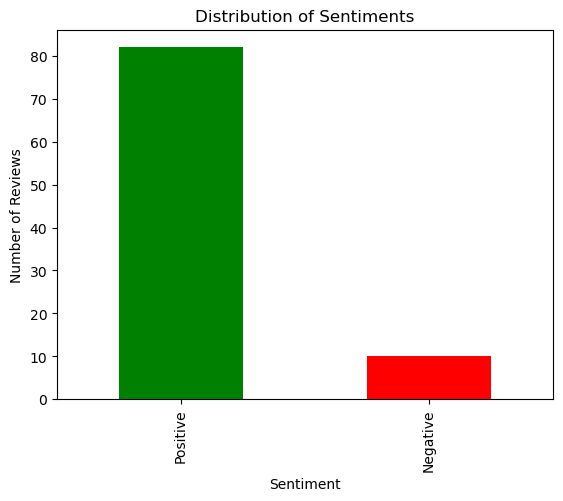

Sentiment
Positive    82
Negative    10
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt

# Count sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Also print the counts
print(sentiment_counts)

In [24]:
# Convert Ratings to numeric (if they are strings)
df["Ratings"] = pd.to_numeric(df["Ratings"], errors="coerce")

Sentiment
Negative    4.900000
Positive    4.914634
Name: Ratings, dtype: float64


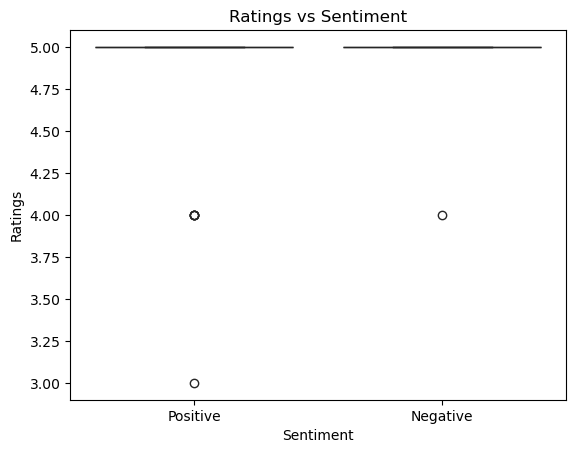

In [25]:
# Average rating by sentiment
avg_rating = df.groupby('Sentiment')['Ratings'].mean()
print(avg_rating)

# Boxplot to visualize
import seaborn as sns
sns.boxplot(x='Sentiment', y='Ratings', hue='Sentiment', data=df, palette={'Positive':'green','Negative':'red'},legend=False)
plt.title('Ratings vs Sentiment')
plt.show()

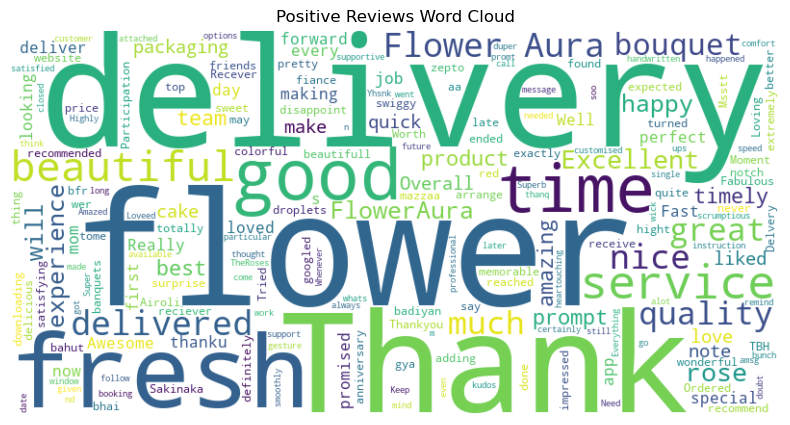

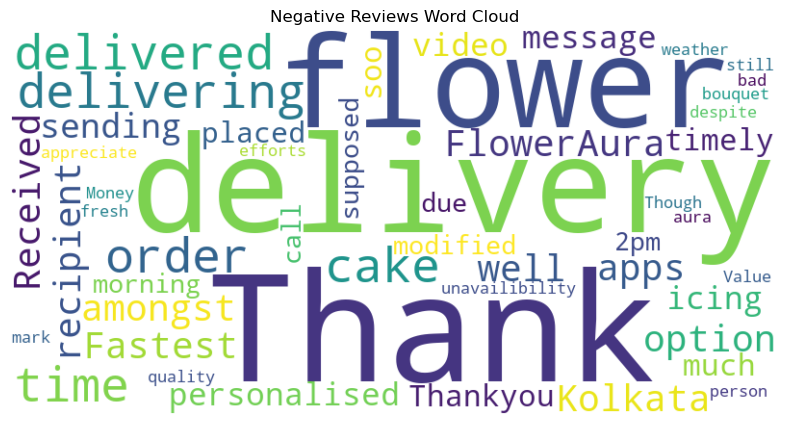

In [27]:
#!pip install wordcloud
from wordcloud import WordCloud

# Positive reviews text
positive_text = " ".join(df[df['Sentiment']=='Positive']['Reviews'])
negative_text = " ".join(df[df['Sentiment']=='Negative']['Reviews'])

# Positive word cloud
wc_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Negative word cloud
wc_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()



Sentiment
Negative    12.100000
Positive    10.207317
Name: Review_Length, dtype: float64


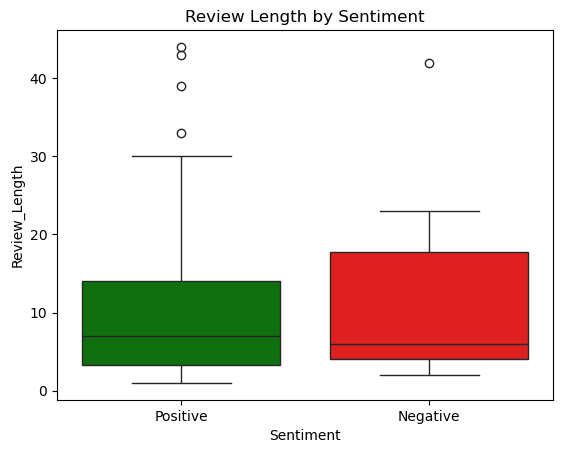

In [28]:
# Add review length column
df['Review_Length'] = df['Reviews'].apply(lambda x: len(str(x).split()))

# Compare average length by sentiment
length_by_sentiment = df.groupby('Sentiment')['Review_Length'].mean()
print(length_by_sentiment)

# Plot
sns.boxplot(x='Sentiment', y='Review_Length', hue='Sentiment',
            data=df,
            palette={'Positive':'green','Negative':'red'},
            legend=False)
plt.title('Review Length by Sentiment')
plt.show()